In [3]:
# Import data from CSV files
from csv import DictReader

with open('_data/fluidized_bed.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows_fb = [r for r in reader]
csv_file.close()

with open('_data/batch_reactor.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows_br = [r for r in reader]
csv_file.close()

with open('_data/tubular_reactor.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows_tr = [r for r in reader]
csv_file.close()

In [19]:
# Here we calculate the Pearson coefficient and p-value; the coefficient measures the linearity between two series of data (x and y), and the p-value is the probability that the null hypothesis (correlation between x and y occurred by chance) is true; a lower p-value means we reject the null hypothesis, indicating a sound correlation

from scipy.stats import spearmanr
from typing import Tuple, List
from csv import DictWriter


def calc_spearman(x: List[float], y: List[float]) -> Tuple[float, float]:
    """
    Given two series of data, filter out any unknown ('-') values, determine Pearson coefficient and p-value

    Args:
        x (List[float]): series 1
        y (List[float]): series 2

    Returns:
        Tuple[float, float]: (coefficient, p-value)
    """

    to_use_x = []
    to_use_y = []

    for i in range(len(x)):
        if x[i] != '-' and y[i] != '-':
            to_use_x.append(float(x[i]))
            to_use_y.append(float(y[i]))

    return spearmanr(to_use_x, to_use_y)

# Separate input variables from target variables
targets = ['Oil', 'Char', 'Gas']
inputs = list(rows_fb[0].keys())
inputs.remove(targets[0])
inputs.remove(targets[1])
inputs.remove(targets[2])

# Iterate over all input/target combinations for FLUIDIZED BED
results = []
for inp in inputs:
    for tar in targets:
        corr_fb, p_fb = calc_spearman([r[inp] for r in rows_fb], [r[tar] for r in rows_fb])
        corr_tr, p_tr = calc_spearman([r[inp] for r in rows_tr], [r[tar] for r in rows_tr])
        corr_br, p_br = calc_spearman([r[inp] for r in rows_br], [r[tar] for r in rows_br])
        results.append({
            'Input Parameter': inp,
            'Yield': tar,
            'Rho (FB)': corr_fb,
            'P-value (FB)': p_fb,
            'Rho (TR)': corr_tr,
            'P-value (TR)': p_tr,
            'Rho (BR)': corr_br,
            'P-value (BR)': p_br
        })

with open('spearman_results.csv', 'w', encoding='utf8') as csv_file:
    writer = DictWriter(csv_file, list(results[0].keys()), delimiter=',', lineterminator='\n')
    writer.writeheader()
    writer.writerows(results)
csv_file.close()

print(results)

[{'Input Parameter': '\ufeffMoisture', 'Yield': 'Oil', 'Rho (FB)': 0.29223580927475207, 'P-value (FB)': 0.035531650514922526, 'Rho (TR)': 0.47135443369959706, 'P-value (TR)': 0.017383576501996956, 'Rho (BR)': -0.13055498587292608, 'P-value (BR)': 0.39265537441215337}, {'Input Parameter': '\ufeffMoisture', 'Yield': 'Char', 'Rho (FB)': 0.16752034012762376, 'P-value (FB)': 0.23520729806512944, 'Rho (TR)': -0.5577331696226766, 'P-value (TR)': 0.0013637051195568258, 'Rho (BR)': -0.3061131963299309, 'P-value (BR)': 0.040848258146137045}, {'Input Parameter': '\ufeffMoisture', 'Yield': 'Gas', 'Rho (FB)': -0.46364563864733294, 'P-value (FB)': 0.0005367285856573146, 'Rho (TR)': -0.6270440131652086, 'P-value (TR)': 0.0007951369790330827, 'Rho (BR)': 0.3698150355826941, 'P-value (BR)': 0.012407795282543762}, {'Input Parameter': 'Feed rate (g/min)', 'Yield': 'Oil', 'Rho (FB)': 0.27561104810860027, 'P-value (FB)': 0.047970102056200135, 'Rho (TR)': -0.8354103483787751, 'P-value (TR)': 7.0361833737144

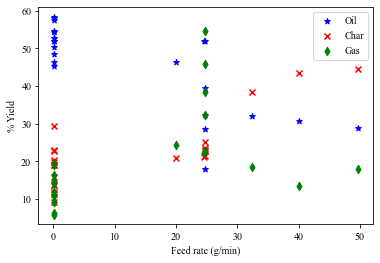

In [22]:
# Yield vs. feed rate, tubular reactor:

from matplotlib import pyplot as plt

feed_rate, oil, char, gas = [], [], [], []

for i in range(len(rows_tr)):
    if rows_tr[i]['Feed rate (g/min)'] != '-' and rows_tr[i]['Oil'] != '-' and rows_tr[i]['Char'] != '-' and rows_tr[i]['Gas'] != '-':
        feed_rate.append(float(rows_tr[i]['Feed rate (g/min)']))
        oil.append(float(rows_tr[i]['Oil']))
        char.append(float(rows_tr[i]['Char']))
        gas.append(float(rows_tr[i]['Gas']))

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(feed_rate, oil, color='blue', label='Oil', marker='*')
plt.scatter(feed_rate, char, color='red', label='Char', marker='x')
plt.scatter(feed_rate, gas, color='green', label='Gas', marker='d')
plt.xlabel('Feed rate (g/min)')
plt.ylabel('% Yield')
plt.legend(loc='upper right')
plt.show()

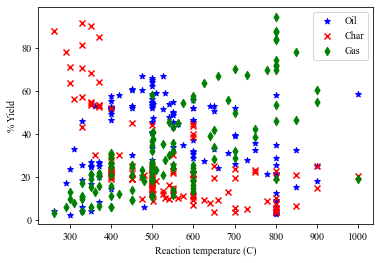

In [21]:
# Yield vs. reaction temperature:

reaction_temp, oil, char, gas = [], [], [], []

for i in range(len(rows_fb)):
    if rows_fb[i]['Reaction temperature (C)'] != '-' and rows_fb[i]['Oil'] != '-' and rows_fb[i]['Char'] != '-' and rows_fb[i]['Gas'] != '-':
        reaction_temp.append(float(rows_fb[i]['Reaction temperature (C)']))
        oil.append(float(rows_fb[i]['Oil']))
        char.append(float(rows_fb[i]['Char']))
        gas.append(float(rows_fb[i]['Gas']))

for i in range(len(rows_br)):
    if rows_br[i]['Reaction temperature (C)'] != '-' and rows_br[i]['Oil'] != '-' and rows_br[i]['Char'] != '-' and rows_br[i]['Gas'] != '-':
        reaction_temp.append(float(rows_br[i]['Reaction temperature (C)']))
        oil.append(float(rows_br[i]['Oil']))
        char.append(float(rows_br[i]['Char']))
        gas.append(float(rows_br[i]['Gas']))

for i in range(len(rows_tr)):
    if rows_tr[i]['Reaction temperature (C)'] != '-' and rows_tr[i]['Oil'] != '-' and rows_tr[i]['Char'] != '-' and rows_tr[i]['Gas'] != '-':
        reaction_temp.append(float(rows_tr[i]['Reaction temperature (C)']))
        oil.append(float(rows_tr[i]['Oil']))
        char.append(float(rows_tr[i]['Char']))
        gas.append(float(rows_tr[i]['Gas']))

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(reaction_temp, oil, color='blue', label='Oil', marker='*')
plt.scatter(reaction_temp, char, color='red', label='Char', marker='x')
plt.scatter(reaction_temp, gas, color='green', label='Gas', marker='d')
plt.xlabel('Reaction temperature (C)')
plt.ylabel('% Yield')
plt.legend(loc='upper right')
plt.show()

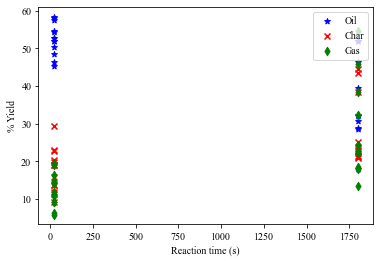

In [23]:
# Yield vs. reaction time, tubular reactor:

reaction_time, oil, char, gas = [], [], [], []

for i in range(len(rows_tr)):
    if rows_tr[i]['Reaction time (s)'] != '-' and rows_tr[i]['Oil'] != '-' and rows_tr[i]['Char'] != '-' and rows_tr[i]['Gas'] != '-':
        reaction_time.append(float(rows_tr[i]['Reaction time (s)']))
        oil.append(float(rows_tr[i]['Oil']))
        char.append(float(rows_tr[i]['Char']))
        gas.append(float(rows_tr[i]['Gas']))

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(reaction_time, oil, color='blue', label='Oil', marker='*')
plt.scatter(reaction_time, char, color='red', label='Char', marker='x')
plt.scatter(reaction_time, gas, color='green', label='Gas', marker='d')
plt.xlabel('Reaction time (s)')
plt.ylabel('% Yield')
plt.legend(loc='upper right')
plt.show()

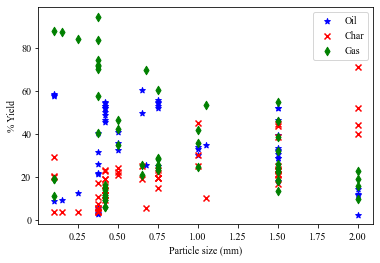

In [24]:
# Yield vs. particle size, tubular and batch reactor:

particle_size, oil, char, gas = [], [], [], []

for i in range(len(rows_tr)):
    if rows_tr[i]['Particle size (mm)'] != '-' and rows_tr[i]['Oil'] != '-' and rows_tr[i]['Char'] != '-' and rows_tr[i]['Gas'] != '-':
        particle_size.append(float(rows_tr[i]['Particle size (mm)']))
        oil.append(float(rows_tr[i]['Oil']))
        char.append(float(rows_tr[i]['Char']))
        gas.append(float(rows_tr[i]['Gas']))

for i in range(len(rows_br)):
    if rows_br[i]['Particle size (mm)'] != '-' and rows_br[i]['Oil'] != '-' and rows_br[i]['Char'] != '-' and rows_br[i]['Gas'] != '-':
        particle_size.append(float(rows_br[i]['Particle size (mm)']))
        oil.append(float(rows_br[i]['Oil']))
        char.append(float(rows_br[i]['Char']))
        gas.append(float(rows_br[i]['Gas']))

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(particle_size, oil, color='blue', label='Oil', marker='*')
plt.scatter(particle_size, char, color='red', label='Char', marker='x')
plt.scatter(particle_size, gas, color='green', label='Gas', marker='d')
plt.xlabel('Particle size (mm)')
plt.ylabel('% Yield')
plt.legend(loc='upper right')
plt.show()